In [ ]:
import zipfile
import os
import shutil

# Chemin du fichier ZIP principal
zip_file_path = 'Retinopathy.zip'
extract_path = 'retinopathy_extracted'

# Fonction pour extraire les fichiers ZIP
def extract_zip(zip_path, extract_path):
    if os.path.exists(extract_path):
        shutil.rmtree(extract_path)
    os.makedirs(extract_path)
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Extraction de {zip_path} terminée.")
    except zipfile.BadZipFile:
        print(f"Erreur : {zip_path} n'est pas un fichier ZIP valide.")
    except FileNotFoundError:
        print(f"Erreur : {zip_path} n'a pas été trouvé.")
    except Exception as e:
        print(f"Erreur lors de l'extraction de {zip_path} : {e}")

# Extraire le fichier ZIP principal
extract_zip(zip_file_path, extract_path)

print("Extraction terminée.")


Extraction de Retinopathy.zip terminée.
Extraction terminée.


Sous-dossier: No_DR, Nombre d'images: 1026
Sous-dossier: Severe, Nombre d'images: 104
Sous-dossier: Proliferate_DR, Nombre d'images: 166
Sous-dossier: Mild, Nombre d'images: 217
Sous-dossier: Moderate, Nombre d'images: 563


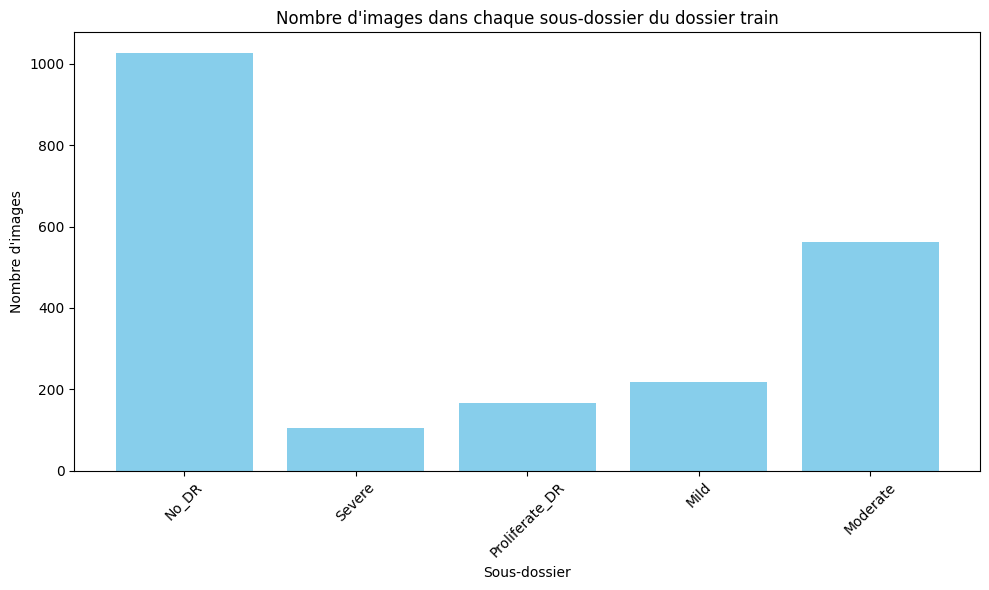

In [ ]:
import os
import matplotlib.pyplot as plt
# Chemin vers le dossier train
train_path = os.path.join(extract_path, 'train')
# Vérifier si le dossier train existe
if not os.path.exists(train_path):
    print(f"Le dossier {train_path} n'existe pas.")
else:
    # Dictionnaire pour stocker le nombre d'images dans chaque sous-dossier
    image_counts = {}
    # Parcourir chaque sous-dossier dans le dossier train
    for root, dirs, files in os.walk(train_path):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            image_files = [f for f in os.listdir(dir_path) if f.endswith(('.jpeg', '.jpg', '.png'))]
            image_counts[dir_name] = len(image_files)
    # Afficher le nombre d'images dans chaque sous-dossier
    for dir_name, count in image_counts.items():
        print(f"Sous-dossier: {dir_name}, Nombre d'images: {count}")
    # Visualisation des résultats sous forme de diagramme à barres
    plt.figure(figsize=(10, 6))
    plt.bar(image_counts.keys(), image_counts.values(), color='skyblue')
    plt.xlabel('Sous-dossier')
    plt.ylabel('Nombre d\'images')
    plt.title('Nombre d\'images dans chaque sous-dossier du dossier train')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Organizing training images...
Catégorie: No_DR, Nombre d'images: 1026
Catégorie: DR, Nombre d'images: 1050
Organizing test images...
Catégorie: No_DR, Nombre d'images: 118
Catégorie: DR, Nombre d'images: 113
Organizing validation images...
Catégorie: No_DR, Nombre d'images: 286
Catégorie: DR, Nombre d'images: 245


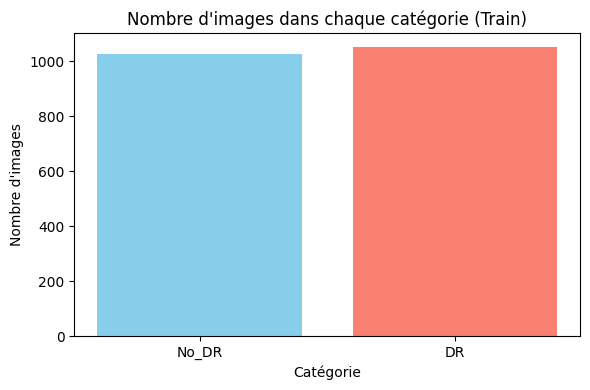

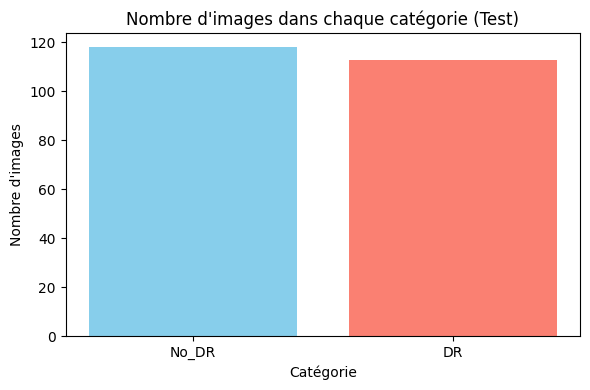

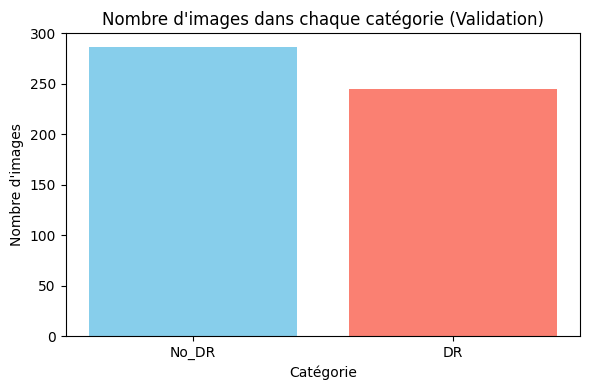

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
# Fonction pour organiser les images en sous-dossiers 'DR' et 'No_DR'
def organize_images(src_folder):
    dr_path = os.path.join(src_folder, 'DR')
    no_dr_path = os.path.join(src_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    # Parcourir les sous-dossiers dans le dossier source
    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            if dir_name != 'No_DR' and dir_name != 'DR':
                for file_name in os.listdir(dir_path):
                    if file_name.endswith(('.jpeg', '.jpg', '.png')):
                        file_path = os.path.join(dir_path, file_name)
                        # Déplacer les fichiers dans le dossier approprié
                        if 'no_dr' in dir_name.lower():
                            shutil.move(file_path, no_dr_path)
                        else:
                            shutil.move(file_path, dr_path)
                # Supprimer le sous-dossier après avoir déplacé les fichiers
                shutil.rmtree(dir_path)
    # Compter le nombre d'images dans 'No_DR' et 'DR'
    image_counts = {'No_DR': 0, 'DR': 0}
    # Compter les images dans le dossier 'No_DR'
    if os.path.exists(no_dr_path):
        image_counts['No_DR'] = len([f for f in os.listdir(no_dr_path) if f.endswith(('.jpeg', '.jpg', '.png'))])
    # Compter les images dans le dossier 'DR'
    if os.path.exists(dr_path):
        image_counts['DR'] = len([f for f in os.listdir(dr_path) if f.endswith(('.jpeg', '.jpg', '.png'))])
    # Afficher le nombre d'images dans chaque catégorie
    for category, count in image_counts.items():
        print(f"Catégorie: {category}, Nombre d'images: {count}")
    return image_counts
# Chemin des dossiers d'extraction
extract_path = 'retinopathy_extracted'
# Organiser les images dans les dossiers 'train', 'test' et 'valid'
train_path = os.path.join(extract_path, 'train')
test_path = os.path.join(extract_path, 'test')
validation_path = os.path.join(extract_path, 'valid')
print("Organizing training images...")
train_counts = organize_images(train_path)
print("Organizing test images...")
test_counts = organize_images(test_path)
print("Organizing validation images...")
validation_counts = organize_images(validation_path)
# Visualisation des résultats sous forme de diagramme à barres pour chaque dossier
def plot_image_counts(counts, title):
    plt.figure(figsize=(6, 4))
    plt.bar(counts.keys(), counts.values(), color=['skyblue', 'salmon'])
    plt.xlabel('Catégorie')
    plt.ylabel("Nombre d'images")
    plt.title(title)
    plt.tight_layout()
    plt.show()
plot_image_counts(train_counts, 'Nombre d\'images dans chaque catégorie (Train)')
plot_image_counts(test_counts, 'Nombre d\'images dans chaque catégorie (Test)')
plot_image_counts(validation_counts, 'Nombre d\'images dans chaque catégorie (Validation)')


In [ ]:
#juste pour la suppression des dossiers remplies
import shutil
import os

# Chemin du dossier à supprimer
folder_path = ''

# Vérifier si le dossier existe
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Le dossier {folder_path} a été supprimé.")
else:
    print(f"Le dossier {folder_path} n'existe pas.")


Le dossier  n'existe pas.


In [ ]:
pip install pillow


In [ ]:
import os
from PIL import Image
# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_extracted/train',
    'valid': 'retinopathy_extracted/valid',
    'test': 'retinopathy_extracted/test'
}
dest_folders = {
    'train': 'retinopathy_resized/train',
    'valid': 'retinopathy_resized/valid',
    'test': 'retinopathy_resized/test'
}

# Taille des images redimensionnées
new_size = (256, 256)  # Exemple : 256x256 pixels
# Fonction pour redimensionner et sauvegarder les images
def resize_images(src_folder, dst_folder, size):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    img_resized = img.resize(size, Image.ANTIALIAS)
                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)
                    img_resized.save(new_file_path)
                    print(f"Image {file} redimensionnée et sauvegardée dans {new_file_path}")
# Redimensionner les images pour les dossiers train, valid, test
for key in source_folders:
    print(f"Redimensionnement des images dans le dossier {key}...")
    resize_images(source_folders[key], dest_folders[key], new_size)


Redimensionnement des images dans le dossier train...
Image 996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg
Image 4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg
Image fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg
Image dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg
Image 5d4e5fd34d91_png.rf.035e49c92d7006ed0201743dfc859ac2.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/5d4e5fd34d91_png.rf.035e49c92d7006ed0201743dfc859ac2.jpg
Image e5197

<ipython-input-5-f262ec520b19>:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_resized = img.resize(size, Image.ANTIALIAS)


Image e82232a3c28b_png.rf.c993c5434b9ffbb40cecf1c3d442d274.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/e82232a3c28b_png.rf.c993c5434b9ffbb40cecf1c3d442d274.jpg
Image 61da799bf0aa_png.rf.bbe4745981143bb931127c261eff8e64.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/61da799bf0aa_png.rf.bbe4745981143bb931127c261eff8e64.jpg
Image 3f6c627e2ff2_png.rf.e6dc00c569c13d0cdfa96b9885494a22.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/3f6c627e2ff2_png.rf.e6dc00c569c13d0cdfa96b9885494a22.jpg
Image b532dedd928c_png.rf.c3d16379537429196ad017319f031c57.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/b532dedd928c_png.rf.c3d16379537429196ad017319f031c57.jpg
Image 76b950c6ed5e_png.rf.2044b8ba57c5fcf3159a7197b884455c.jpg redimensionnée et sauvegardée dans retinopathy_resized/train/No_DR/76b950c6ed5e_png.rf.2044b8ba57c5fcf3159a7197b884455c.jpg
Image 4134b290f5f3_png.rf.ff33978f56dc63af002bc8e3b21325c7.jpg re

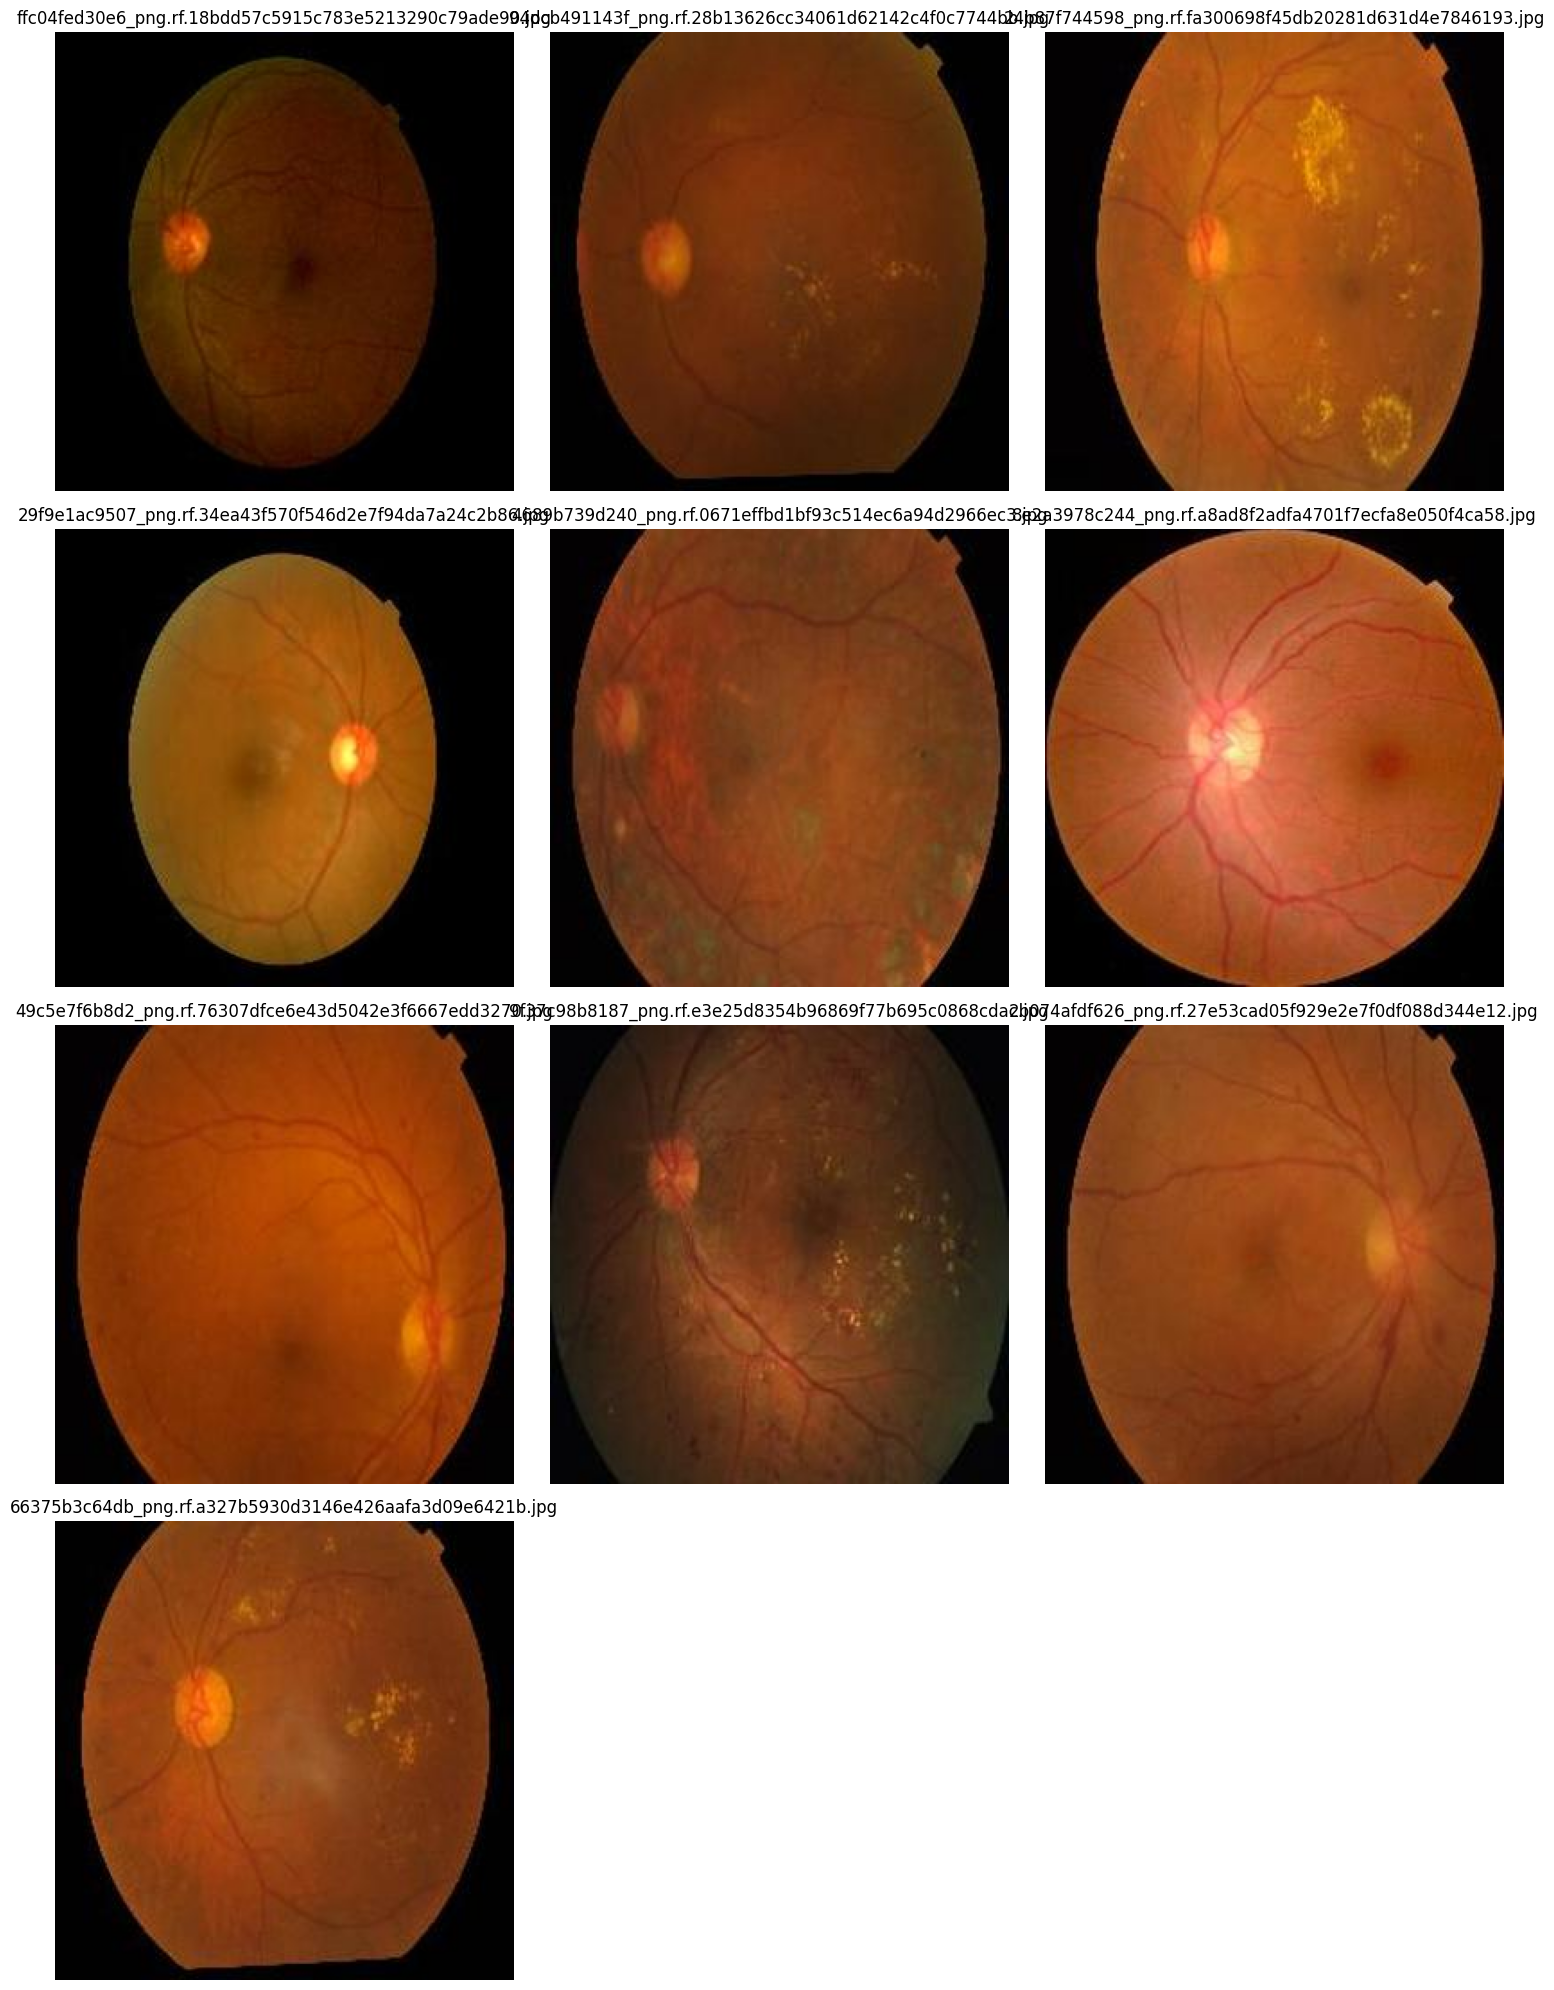

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Fonction pour visualiser les images
def visualize_resized_images(folder, num_images=5):
    all_images = []

    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(('.jpeg', '.jpg', '.png')):
                all_images.append(os.path.join(root, file))

    # Sélectionner un échantillon aléatoire d'images à afficher
    images_to_display = random.sample(all_images, min(num_images, len(all_images)))

    # Définir la grille de visualisation
    num_cols = 3
    num_rows = (len(images_to_display) + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))

    for i, img_path in enumerate(images_to_display):
        plt.subplot(num_rows, num_cols, i + 1)
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualiser les images redimensionnées
visualize_resized_images('retinopathy_resized/train', num_images=10)


In [ ]:
import os
import numpy as np
from PIL import Image
# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_resized/train',
    'valid': 'retinopathy_resized/valid',
    'test': 'retinopathy_resized/test'
}
dest_folders = {
    'train': 'retinopathy_normalized/train',
    'valid': 'retinopathy_normalized/valid',
    'test': 'retinopathy_normalized/test'
}
# Fonction pour normaliser et sauvegarder les images
def normalize_images(src_folder, dst_folder):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    img_array = np.array(img).astype(np.float32)
                    # Normalisation : soustraction de la moyenne et division par l'écart type
                    normalized_img = (img_array - np.mean(img_array)) / np.std(img_array)
                    # Mise à l'échelle des valeurs des pixels entre 0 et 255
                    normalized_img = (normalized_img - normalized_img.min()) / (normalized_img.max() - normalized_img.min()) * 255
                    # Conversion des valeurs des pixels en type entier 8 bits
                    normalized_img = normalized_img.astype(np.uint8)
                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)
                    # Enregistrer l'image normalisée
                    normalized_img_pil = Image.fromarray(normalized_img)
                    normalized_img_pil.save(new_file_path)
                    print(f"Image {file} normalisée et sauvegardée dans {new_file_path}")
# Normaliser les images pour les dossiers train, valid, test
for key in source_folders:
    print(f"Normalisation des images dans le dossier {key}...")
    normalize_images(source_folders[key], dest_folders[key])

Normalisation des images dans le dossier train...
Image 996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg
Image 4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg
Image fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg
Image dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/dd285d9e97fe_png.rf.4537df2aff8ceacbecd2d9448f299ae0.jpg
Image 5d4e5fd34d91_png.rf.035e49c92d7006ed0201743dfc859ac2.jpg normalisée et sauvegardée dans retinopathy_normalized/train/No_DR/5d4e5fd34d91_png.rf.035e49c92d7006ed0201743dfc859ac2.jpg
Image e5197d77ec68_p

Traitement des images pour le dataset train...
Image 996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/train/No_DR/996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg
Image 996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/train/No_DR/996f9bba4ef0_png.rf.e236d490a8801a7fd88e19db3bc18814.jpg
Image 4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/train/No_DR/4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg
Image 4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/train/No_DR/4e1e252317b5_png.rf.3b3709140c8f81d6a9b95d043bd745a7.jpg
Image fb767cea406c_png.rf.26d1bb44a66dde6957235e7c04627964.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/train/No_DR/fb767cea406

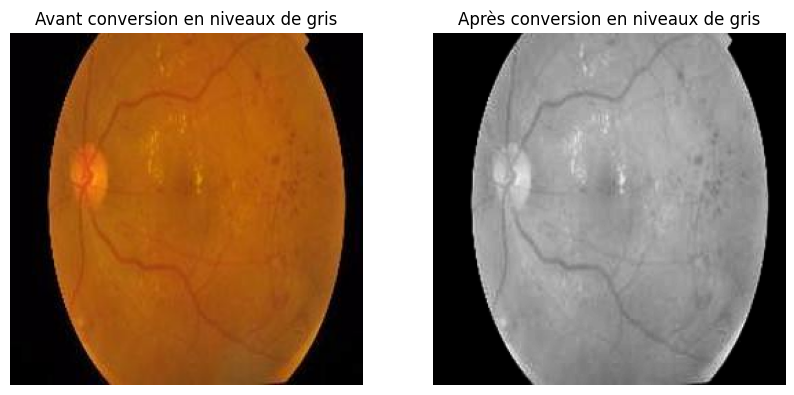

Traitement des images pour le dataset valid...
Image 099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid/No_DR/099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg
Image 099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/valid/No_DR/099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg
Image 6a57a3db3eff_png.rf.297d56f110b7ad35773a7b7cd80a5d6f.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid/No_DR/6a57a3db3eff_png.rf.297d56f110b7ad35773a7b7cd80a5d6f.jpg
Image 6a57a3db3eff_png.rf.297d56f110b7ad35773a7b7cd80a5d6f.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/valid/No_DR/6a57a3db3eff_png.rf.297d56f110b7ad35773a7b7cd80a5d6f.jpg
Image b0f8613305a3_png.rf.0f3c12b8b3c0cf8b877b1b7e4a7940e3.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid/No_DR/b0f8613305a

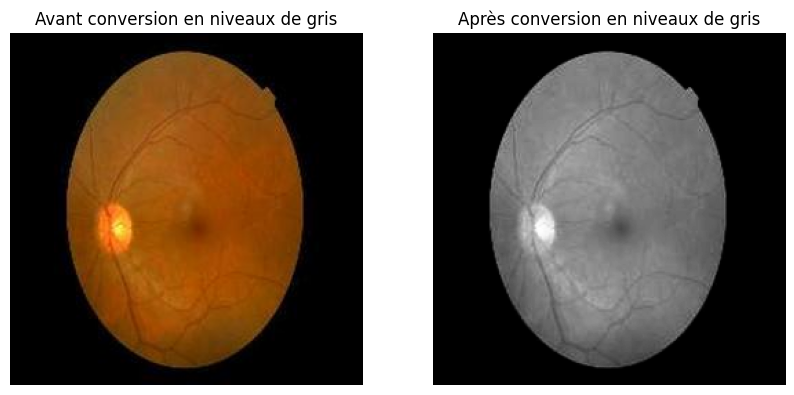

Traitement des images pour le dataset test...
Image dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test/No_DR/dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg
Image dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/test/No_DR/dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg
Image 7ad0c4975890_png.rf.be6cbc9236535e912e8ae94da5456440.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test/No_DR/7ad0c4975890_png.rf.be6cbc9236535e912e8ae94da5456440.jpg
Image 7ad0c4975890_png.rf.be6cbc9236535e912e8ae94da5456440.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/test/No_DR/7ad0c4975890_png.rf.be6cbc9236535e912e8ae94da5456440.jpg
Image 8344c783da65_png.rf.4f2ce312754bb39a7ccd531e7b38f1bf.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test/No_DR/8344c783da65_png.

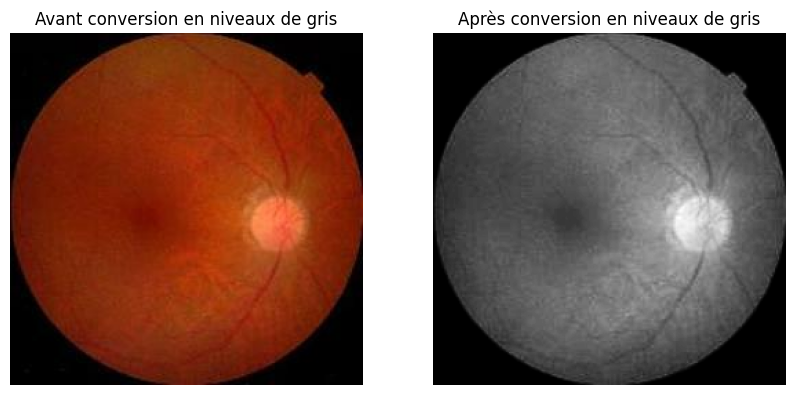

In [ ]:
import os
import csv
import random
from PIL import Image, ImageEnhance, ExifTags
import matplotlib.pyplot as plt

# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_normalized/train',
    'valid': 'retinopathy_normalized/valid',
    'test': 'retinopathy_normalized/test'
}
dest_folders = {
    'train': 'retinopathy_contrast_enhanced/train',
    'valid': 'retinopathy_contrast_enhanced/valid',
    'test': 'retinopathy_contrast_enhanced/test'
}
gray_dest_folders = {
    'train': 'retinopathy_gray/train',
    'valid': 'retinopathy_gray/valid',
    'test': 'retinopathy_gray/test'
}
csv_file_paths = {
    'train': 'image_labels_train.csv',
    'valid': 'image_labels_valid.csv',
    'test': 'image_labels_test.csv'
}

# Facteur d'amélioration du contraste (exemple : 1.5 pour une légère amélioration)
contrast_factor = 1.5

# Fonction pour ajuster l'orientation des images selon leurs métadonnées EXIF
def adjust_image_orientation(image):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        exif = image._getexif()
        if exif is not None:
            orientation_value = exif.get(orientation)
            if orientation_value == 3:
                image = image.rotate(180, expand=True)
            elif orientation_value == 6:
                image = image.rotate(270, expand=True)
            elif orientation_value == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        # Cas où l'image n'a pas de métadonnées EXIF
        pass
    return image

# Fonction pour améliorer le contraste des images, ajuster leur orientation, les convertir en niveaux de gris et les sauvegarder
def enhance_contrast_images(src_folder, dst_folder, gray_dst_folder, contrast_factor):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    if not os.path.exists(gray_dst_folder):
        os.makedirs(gray_dst_folder)
    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')
    gray_dr_path = os.path.join(gray_dst_folder, 'DR')
    gray_no_dr_path = os.path.join(gray_dst_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    if not os.path.exists(gray_dr_path):
        os.makedirs(gray_dr_path)
    if not os.path.exists(gray_no_dr_path):
        os.makedirs(gray_no_dr_path)

    image_pairs = []  # Pour stocker les paires d'images avant/après conversion

    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    # Ajuster l'orientation de l'image
                    img = adjust_image_orientation(img)
                    # Appliquer l'amélioration du contraste
                    enhancer = ImageEnhance.Contrast(img)
                    enhanced_img = enhancer.enhance(contrast_factor)
                    # Convertir l'image en niveaux de gris
                    gray_img = enhanced_img.convert('L')
                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                        gray_file_path = os.path.join(gray_no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)
                        gray_file_path = os.path.join(gray_dr_path, file)
                    # Enregistrer l'image avec contraste amélioré
                    enhanced_img.save(new_file_path)
                    # Enregistrer l'image convertie en niveaux de gris
                    gray_img.save(gray_file_path)
                    print(f"Image {file} avec contraste amélioré sauvegardée dans {new_file_path}")
                    print(f"Image {file} convertie en niveaux de gris sauvegardée dans {gray_file_path}")

                    # Ajouter la paire d'images avant/après pour affichage
                    image_pairs.append((img, gray_img))

    return image_pairs

# Fonction pour écrire un fichier CSV avec les noms d'images et leurs étiquettes
def write_image_labels_to_csv(folder, csv_path):
    image_info = []
    for root, dirs, files in os.walk(folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            label = dir_name  # Label is the directory name (DR ou No_DR)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    image_info.append([file, label])
    # Écrire les informations des images dans un fichier CSV
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Label'])
        writer.writerows(image_info)
    print(f"Fichier CSV généré : {csv_path}")

# Améliorer le contraste des images, convertir en niveaux de gris et générer les fichiers CSV pour train, valid et test
for dataset in ['train', 'valid', 'test']:
    print(f"Traitement des images pour le dataset {dataset}...")
    image_pairs = enhance_contrast_images(source_folders[dataset], dest_folders[dataset], gray_dest_folders[dataset], contrast_factor)
    write_image_labels_to_csv(dest_folders[dataset], csv_file_paths[dataset])

    # Afficher une image aléatoire avant et après la conversion en niveaux de gris
    if image_pairs:
        before_img, after_img = random.choice(image_pairs)
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Avant conversion en niveaux de gris')
        plt.imshow(before_img)
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.title('Après conversion en niveaux de gris')
        plt.imshow(after_img, cmap='gray')
        plt.axis('off')
        plt.show()


Streaming output truncated to the last 5000 lines.
Image 0cecc2864b7f_png.rf.1d89ef69908fcb5ad7dfd2e2f127a979.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/train/No_DR/0cecc2864b7f_png.rf.1d89ef69908fcb5ad7dfd2e2f127a979.jpg
Image 49eb73968c44_png.rf.4467694f0a903bea39b7c191f4435007.jpg originale sauvegardée dans retinopathy_original/train/No_DR/49eb73968c44_png.rf.4467694f0a903bea39b7c191f4435007.jpg
Image 49eb73968c44_png.rf.4467694f0a903bea39b7c191f4435007.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/train/No_DR/49eb73968c44_png.rf.4467694f0a903bea39b7c191f4435007.jpg
Image 49eb73968c44_png.rf.4467694f0a903bea39b7c191f4435007.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/train/No_DR/49eb73968c44_png.rf.4467694f0a903bea39b7c191f4435007.jpg
Image a77eb914b383_png.rf.fcfd7ea6244033ddcd96cb59c1d3476d.jpg originale sauvegardée dans retinopathy_original/train/No_DR/a77eb914b383_png.rf.fcfd7ea6244033ddcd96cb59c1d3476d.

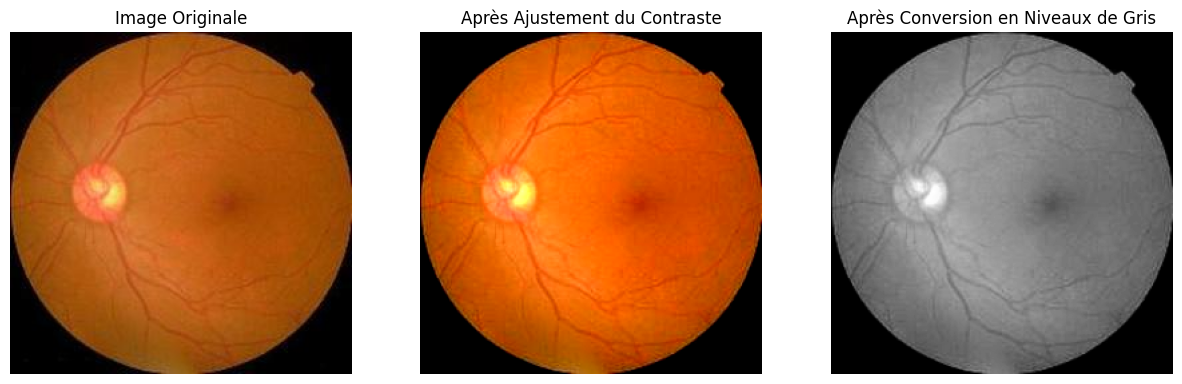

Traitement des images pour le dataset valid...
Image 099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg originale sauvegardée dans retinopathy_original/valid/No_DR/099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg
Image 099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid/No_DR/099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg
Image 099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/valid/No_DR/099021fac3c9_png.rf.cb2fa19530ddced1e5b820c2861f0a09.jpg
Image 6a57a3db3eff_png.rf.297d56f110b7ad35773a7b7cd80a5d6f.jpg originale sauvegardée dans retinopathy_original/valid/No_DR/6a57a3db3eff_png.rf.297d56f110b7ad35773a7b7cd80a5d6f.jpg
Image 6a57a3db3eff_png.rf.297d56f110b7ad35773a7b7cd80a5d6f.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/valid/No_DR/6a57a3db3eff_png.rf.297d56f110b7ad35773a7b7cd80a5

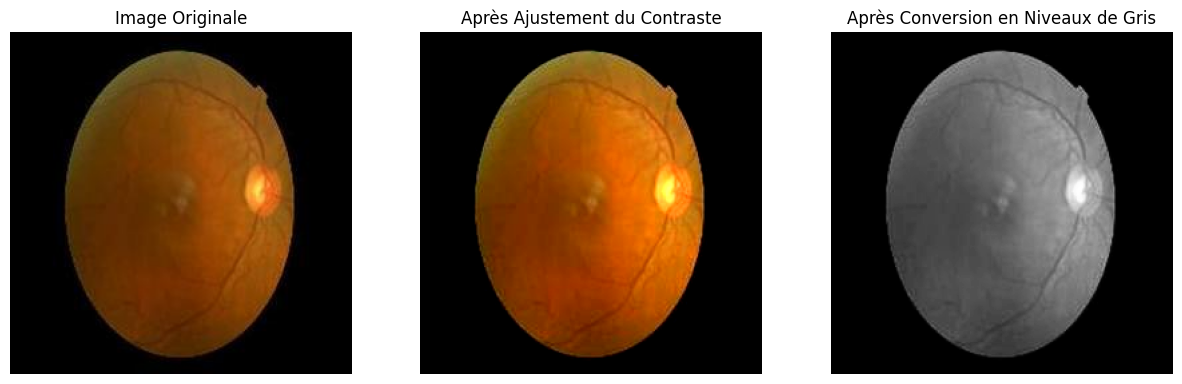

Traitement des images pour le dataset test...
Image dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg originale sauvegardée dans retinopathy_original/test/No_DR/dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg
Image dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test/No_DR/dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg
Image dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg convertie en niveaux de gris sauvegardée dans retinopathy_gray/test/No_DR/dce73d90c00c_png.rf.69e299504e07bbb34f316e88c5445a93.jpg
Image 7ad0c4975890_png.rf.be6cbc9236535e912e8ae94da5456440.jpg originale sauvegardée dans retinopathy_original/test/No_DR/7ad0c4975890_png.rf.be6cbc9236535e912e8ae94da5456440.jpg
Image 7ad0c4975890_png.rf.be6cbc9236535e912e8ae94da5456440.jpg avec contraste amélioré sauvegardée dans retinopathy_contrast_enhanced/test/No_DR/7ad0c4975890_png.rf.be6cbc9236535e912e8ae94da5456440.jp

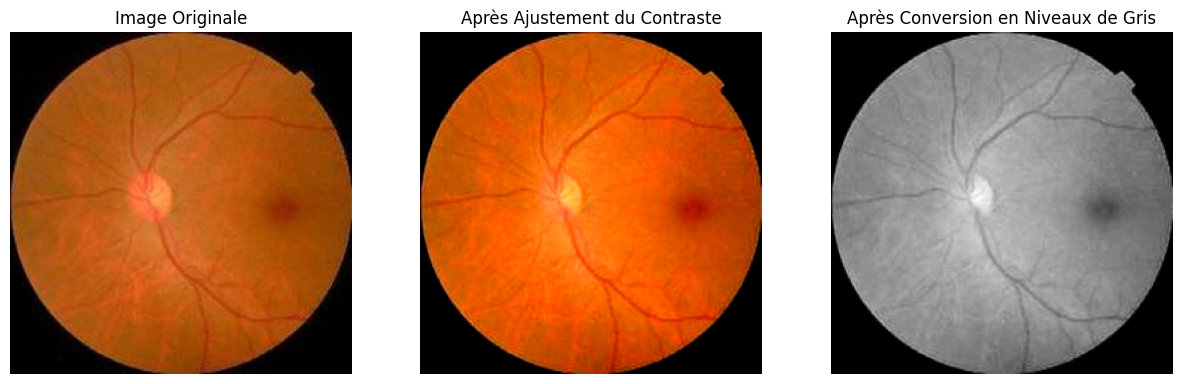

In [ ]:
import os
import csv
import random
from PIL import Image, ImageEnhance, ExifTags
import matplotlib.pyplot as plt

# Chemins vers les dossiers d'origine et de destination pour train, valid, test
source_folders = {
    'train': 'retinopathy_normalized/train',
    'valid': 'retinopathy_normalized/valid',
    'test': 'retinopathy_normalized/test'
}
dest_folders = {
    'train': 'retinopathy_contrast_enhanced/train',
    'valid': 'retinopathy_contrast_enhanced/valid',
    'test': 'retinopathy_contrast_enhanced/test'
}
gray_dest_folders = {
    'train': 'retinopathy_gray/train',
    'valid': 'retinopathy_gray/valid',
    'test': 'retinopathy_gray/test'
}
original_dest_folders = {
    'train': 'retinopathy_original/train',
    'valid': 'retinopathy_original/valid',
    'test': 'retinopathy_original/test'
}
csv_file_paths = {
    'train': 'image_labels_train.csv',
    'valid': 'image_labels_valid.csv',
    'test': 'image_labels_test.csv'
}

# Facteur d'amélioration du contraste (exemple : 1.5 pour une légère amélioration)
contrast_factor = 1.5

# Fonction pour ajuster l'orientation des images selon leurs métadonnées EXIF
def adjust_image_orientation(image):
    try:
        for orientation in ExifTags.TAGS.keys():
            if ExifTags.TAGS[orientation] == 'Orientation':
                break
        exif = image._getexif()
        if exif is not None:
            orientation_value = exif.get(orientation)
            if orientation_value == 3:
                image = image.rotate(180, expand=True)
            elif orientation_value == 6:
                image = image.rotate(270, expand=True)
            elif orientation_value == 8:
                image = image.rotate(90, expand=True)
    except (AttributeError, KeyError, IndexError):
        # Cas où l'image n'a pas de métadonnées EXIF
        pass
    return image

# Fonction pour améliorer le contraste des images, ajuster leur orientation, les convertir en niveaux de gris et les sauvegarder
def enhance_contrast_images(src_folder, dst_folder, gray_dst_folder, original_dst_folder, contrast_factor):
    if not os.path.exists(dst_folder):
        os.makedirs(dst_folder)
    if not os.path.exists(gray_dst_folder):
        os.makedirs(gray_dst_folder)
    if not os.path.exists(original_dst_folder):
        os.makedirs(original_dst_folder)
    dr_path = os.path.join(dst_folder, 'DR')
    no_dr_path = os.path.join(dst_folder, 'No_DR')
    gray_dr_path = os.path.join(gray_dst_folder, 'DR')
    gray_no_dr_path = os.path.join(gray_dst_folder, 'No_DR')
    original_dr_path = os.path.join(original_dst_folder, 'DR')
    original_no_dr_path = os.path.join(original_dst_folder, 'No_DR')
    # Créer les dossiers 'DR' et 'No_DR' si ce n'est pas déjà fait
    if not os.path.exists(dr_path):
        os.makedirs(dr_path)
    if not os.path.exists(no_dr_path):
        os.makedirs(no_dr_path)
    if not os.path.exists(gray_dr_path):
        os.makedirs(gray_dr_path)
    if not os.path.exists(gray_no_dr_path):
        os.makedirs(gray_no_dr_path)
    if not os.path.exists(original_dr_path):
        os.makedirs(original_dr_path)
    if not os.path.exists(original_no_dr_path):
        os.makedirs(original_no_dr_path)

    image_triplets = []  # Pour stocker les triplets d'images avant/après contraste et niveaux de gris

    for root, dirs, files in os.walk(src_folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    file_path = os.path.join(category_path, file)
                    img = Image.open(file_path)
                    # Ajuster l'orientation de l'image
                    img = adjust_image_orientation(img)
                    # Appliquer l'amélioration du contraste
                    enhancer = ImageEnhance.Contrast(img)
                    enhanced_img = enhancer.enhance(contrast_factor)
                    # Convertir l'image en niveaux de gris
                    gray_img = enhanced_img.convert('L')
                    # Déterminer le dossier de destination (DR ou No_DR)
                    if 'no_dr' in dir_name.lower():
                        new_file_path = os.path.join(no_dr_path, file)
                        gray_file_path = os.path.join(gray_no_dr_path, file)
                        original_file_path = os.path.join(original_no_dr_path, file)
                    else:
                        new_file_path = os.path.join(dr_path, file)
                        gray_file_path = os.path.join(gray_dr_path, file)
                        original_file_path = os.path.join(original_dr_path, file)
                    # Enregistrer l'image originale, avec contraste amélioré et convertie en niveaux de gris
                    img.save(original_file_path)
                    enhanced_img.save(new_file_path)
                    gray_img.save(gray_file_path)
                    print(f"Image {file} originale sauvegardée dans {original_file_path}")
                    print(f"Image {file} avec contraste amélioré sauvegardée dans {new_file_path}")
                    print(f"Image {file} convertie en niveaux de gris sauvegardée dans {gray_file_path}")

                    # Ajouter le triplet d'images avant/après contraste et niveaux de gris pour affichage
                    image_triplets.append((img, enhanced_img, gray_img))

    return image_triplets

# Fonction pour écrire un fichier CSV avec les noms d'images et leurs étiquettes
def write_image_labels_to_csv(folder, csv_path):
    image_info = []
    for root, dirs, files in os.walk(folder):
        for dir_name in dirs:
            category_path = os.path.join(root, dir_name)
            label = dir_name  # Label is the directory name (DR ou No_DR)
            for file in os.listdir(category_path):
                if file.endswith(('.jpeg', '.jpg', '.png')):
                    image_info.append([file, label])
    # Écrire les informations des images dans un fichier CSV
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Label'])
        writer.writerows(image_info)
    print(f"Fichier CSV généré : {csv_path}")

# Améliorer le contraste des images, convertir en niveaux de gris et générer les fichiers CSV pour train, valid et test
for dataset in ['train', 'valid', 'test']:
    print(f"Traitement des images pour le dataset {dataset}...")
    image_triplets = enhance_contrast_images(source_folders[dataset], dest_folders[dataset], gray_dest_folders[dataset], original_dest_folders[dataset], contrast_factor)
    write_image_labels_to_csv(dest_folders[dataset], csv_file_paths[dataset])

    # Afficher une image aléatoire avant et après l'ajustement du contraste et après conversion en niveaux de gris
    if image_triplets:
        original_img, contrast_img, gray_img = random.choice(image_triplets)
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.title('Image Originale')
        plt.imshow(original_img)
        plt.axis('off')
        plt.subplot(1, 3, 2)
        plt.title('Après Ajustement du Contraste')
        plt.imshow(contrast_img)
        plt.axis('off')
        plt.subplot(1, 3, 3)
        plt.title('Après Conversion en Niveaux de Gris')
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
        plt.show()


#**Modele inception**  

Loading train data into memory...
Done.
Loading valid data into memory...
Done.
Loading test data into memory...
Done.
Training Size: 2076 images
Validation Size: 531 images
Test Size: 231 images
Epoch 1/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 1s 1s/step


  6%|▋         | 1/16 [00:03<00:45,  3.03s/it]

1/1 [==============================] - 0s 55ms/step


 12%|█▎        | 2/16 [00:03<00:22,  1.59s/it]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 3/16 [00:04<00:14,  1.12s/it]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 4/16 [00:04<00:10,  1.10it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███▏      | 5/16 [00:05<00:08,  1.28it/s]

1/1 [==============================] - 0s 52ms/step


 38%|███▊      | 6/16 [00:05<00:07,  1.41it/s]

1/1 [==============================] - 0s 53ms/step


 44%|████▍     | 7/16 [00:06<00:06,  1.49it/s]

1/1 [==============================] - 0s 77ms/step


 50%|█████     | 8/16 [00:07<00:05,  1.49it/s]

1/1 [==============================] - 0s 80ms/step


 56%|█████▋    | 9/16 [00:07<00:04,  1.45it/s]

1/1 [==============================] - 0s 83ms/step


 62%|██████▎   | 10/16 [00:08<00:04,  1.41it/s]

1/1 [==============================] - 0s 82ms/step


 69%|██████▉   | 11/16 [00:09<00:03,  1.39it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▌  | 12/16 [00:09<00:02,  1.48it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████▏ | 13/16 [00:10<00:01,  1.55it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 14/16 [00:11<00:01,  1.62it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 15/16 [00:11<00:00,  1.63it/s]

1/1 [==============================] - 0s 53ms/step


100%|██████████| 16/16 [00:12<00:00,  1.31it/s]


Train Loss: 0.5318527844501659, Train Accuracy: 0.82275390625
Valid Loss: 0.2204147493466735, Valid Accuracy: 0.91796875
Valid Recall: 0.9652173913043478, Valid F1-Score: 0.9135802469135802
Epoch 2/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 80ms/step


  6%|▋         | 1/16 [00:00<00:13,  1.12it/s]

1/1 [==============================] - 0s 62ms/step


 12%|█▎        | 2/16 [00:01<00:10,  1.32it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 3/16 [00:02<00:08,  1.48it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.57it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███▏      | 5/16 [00:03<00:06,  1.61it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 6/16 [00:03<00:06,  1.65it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.68it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 8/16 [00:05<00:04,  1.68it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.70it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▎   | 10/16 [00:06<00:03,  1.68it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 11/16 [00:06<00:02,  1.68it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.57it/s]

1/1 [==============================] - 0s 52ms/step


 81%|████████▏ | 13/16 [00:08<00:01,  1.61it/s]

1/1 [==============================] - 0s 54ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.65it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.68it/s]

1/1 [==============================] - 0s 58ms/step


100%|██████████| 16/16 [00:09<00:00,  1.62it/s]


Train Loss: 0.18044904741691425, Train Accuracy: 0.93994140625
Valid Loss: 0.1595011397730559, Valid Accuracy: 0.935546875
Valid Recall: 0.9109311740890689, Valid F1-Score: 0.9316770186335404
Epoch 3/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.67it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.66it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.67it/s]

1/1 [==============================] - 0s 58ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.64it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███▏      | 5/16 [00:03<00:06,  1.66it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.67it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.68it/s]

1/1 [==============================] - 0s 75ms/step


 50%|█████     | 8/16 [00:05<00:05,  1.46it/s]

1/1 [==============================] - 0s 85ms/step


 56%|█████▋    | 9/16 [00:05<00:05,  1.35it/s]

1/1 [==============================] - 0s 84ms/step


 62%|██████▎   | 10/16 [00:06<00:04,  1.26it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 11/16 [00:07<00:03,  1.37it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.47it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████▏ | 13/16 [00:08<00:01,  1.52it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 14/16 [00:09<00:01,  1.56it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.59it/s]

1/1 [==============================] - 0s 56ms/step


100%|██████████| 16/16 [00:10<00:00,  1.54it/s]


Train Loss: 0.13707774778595194, Train Accuracy: 0.95849609375
Valid Loss: 0.15269525488838553, Valid Accuracy: 0.919921875
Valid Recall: 0.9012345679012346, Valid F1-Score: 0.9144050104384134
Epoch 4/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.70it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.70it/s]

1/1 [==============================] - 0s 57ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.69it/s]

1/1 [==============================] - 0s 58ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.71it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███▏      | 5/16 [00:02<00:06,  1.71it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.70it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.67it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.68it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.69it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▎   | 10/16 [00:05<00:03,  1.69it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 11/16 [00:06<00:02,  1.71it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.70it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████▏ | 13/16 [00:07<00:01,  1.68it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.70it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 15/16 [00:08<00:00,  1.72it/s]

1/1 [==============================] - 0s 53ms/step


100%|██████████| 16/16 [00:09<00:00,  1.70it/s]


Train Loss: 0.12684113081195392, Train Accuracy: 0.95849609375
Valid Loss: 0.0995172155671753, Valid Accuracy: 0.951171875
Valid Recall: 0.9402390438247012, Valid F1-Score: 0.9496981891348089
Epoch 5/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.69it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.72it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.71it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.71it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███▏      | 5/16 [00:02<00:06,  1.70it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.71it/s]

1/1 [==============================] - 0s 75ms/step


 44%|████▍     | 7/16 [00:04<00:06,  1.45it/s]

1/1 [==============================] - 0s 78ms/step


 50%|█████     | 8/16 [00:05<00:05,  1.42it/s]

1/1 [==============================] - 0s 90ms/step


 56%|█████▋    | 9/16 [00:05<00:05,  1.39it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▎   | 10/16 [00:06<00:04,  1.38it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 11/16 [00:07<00:03,  1.46it/s]

1/1 [==============================] - 0s 55ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.53it/s]

1/1 [==============================] - 0s 56ms/step


 81%|████████▏ | 13/16 [00:08<00:01,  1.58it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.62it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.64it/s]

1/1 [==============================] - 0s 61ms/step


100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


Train Loss: 0.08949798945104703, Train Accuracy: 0.970703125
Valid Loss: 0.14247147808782756, Valid Accuracy: 0.93359375
Valid Recall: 0.8755364806866953, Valid F1-Score: 0.923076923076923
Epoch 6/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.67it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.71it/s]

1/1 [==============================] - 0s 53ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.72it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.70it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███▏      | 5/16 [00:02<00:06,  1.70it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.69it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.67it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 8/16 [00:05<00:05,  1.43it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.51it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▎   | 10/16 [00:06<00:03,  1.58it/s]

1/1 [==============================] - 0s 53ms/step


 69%|██████▉   | 11/16 [00:06<00:03,  1.62it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.65it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████▏ | 13/16 [00:07<00:01,  1.67it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.66it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.68it/s]

1/1 [==============================] - 0s 57ms/step


100%|██████████| 16/16 [00:09<00:00,  1.64it/s]


Train Loss: 0.08830651320749894, Train Accuracy: 0.96630859375
Valid Loss: 0.13780423440039158, Valid Accuracy: 0.939453125
Valid Recall: 0.8902439024390244, Valid F1-Score: 0.9339019189765458
Epoch 7/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.75it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.73it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.66it/s]

1/1 [==============================] - 0s 55ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.69it/s]

1/1 [==============================] - 0s 61ms/step


 31%|███▏      | 5/16 [00:02<00:06,  1.69it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.71it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.71it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.70it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.47it/s]

1/1 [==============================] - 0s 78ms/step


 62%|██████▎   | 10/16 [00:06<00:04,  1.35it/s]

1/1 [==============================] - 0s 76ms/step


 69%|██████▉   | 11/16 [00:07<00:03,  1.34it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.39it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████▏ | 13/16 [00:08<00:02,  1.48it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 14/16 [00:09<00:01,  1.55it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.59it/s]

1/1 [==============================] - 0s 60ms/step


100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


Train Loss: 0.09557796514127403, Train Accuracy: 0.9677734375
Valid Loss: 0.0901409609359689, Valid Accuracy: 0.97265625
Valid Recall: 0.9789915966386554, Valid F1-Score: 0.9708333333333334
Epoch 8/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 96ms/step


  6%|▋         | 1/16 [00:00<00:14,  1.04it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▎        | 2/16 [00:01<00:10,  1.33it/s]

1/1 [==============================] - 0s 75ms/step


 19%|█▉        | 3/16 [00:02<00:08,  1.47it/s]

1/1 [==============================] - 0s 52ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.56it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███▏      | 5/16 [00:03<00:06,  1.63it/s]

1/1 [==============================] - 0s 54ms/step


 38%|███▊      | 6/16 [00:03<00:06,  1.66it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.66it/s]

1/1 [==============================] - 0s 60ms/step


 50%|█████     | 8/16 [00:05<00:04,  1.68it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.69it/s]

1/1 [==============================] - 0s 63ms/step


 62%|██████▎   | 10/16 [00:06<00:03,  1.69it/s]

1/1 [==============================] - 0s 56ms/step


 69%|██████▉   | 11/16 [00:06<00:02,  1.68it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.69it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████▏ | 13/16 [00:08<00:01,  1.70it/s]

1/1 [==============================] - 0s 52ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.71it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.73it/s]

1/1 [==============================] - 0s 53ms/step


100%|██████████| 16/16 [00:09<00:00,  1.64it/s]


Train Loss: 0.09431833454436855, Train Accuracy: 0.97021484375
Valid Loss: 0.174038895056583, Valid Accuracy: 0.94140625
Valid Recall: 0.8983739837398373, Valid F1-Score: 0.9364406779661016
Epoch 9/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 53ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.70it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.72it/s]

1/1 [==============================] - 0s 55ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.71it/s]

1/1 [==============================] - 0s 55ms/step


 25%|██▌       | 4/16 [00:02<00:06,  1.72it/s]

1/1 [==============================] - 0s 53ms/step


 31%|███▏      | 5/16 [00:02<00:06,  1.68it/s]

1/1 [==============================] - 0s 55ms/step


 38%|███▊      | 6/16 [00:03<00:06,  1.66it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.66it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.68it/s]

1/1 [==============================] - 0s 101ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.49it/s]

1/1 [==============================] - 0s 79ms/step


 62%|██████▎   | 10/16 [00:06<00:04,  1.36it/s]

1/1 [==============================] - 0s 83ms/step


 69%|██████▉   | 11/16 [00:07<00:03,  1.34it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.43it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████▏ | 13/16 [00:08<00:01,  1.51it/s]

1/1 [==============================] - 0s 57ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.56it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.58it/s]

1/1 [==============================] - 0s 56ms/step


100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


Train Loss: 0.08566888041968923, Train Accuracy: 0.96923828125
Valid Loss: 0.11080703651532531, Valid Accuracy: 0.96484375
Valid Recall: 0.9585062240663901, Valid F1-Score: 0.9625
Epoch 10/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▋         | 1/16 [00:00<00:09,  1.63it/s]

1/1 [==============================] - 0s 58ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.67it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.68it/s]

1/1 [==============================] - 0s 53ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.69it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███▏      | 5/16 [00:02<00:06,  1.71it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.72it/s]

1/1 [==============================] - 0s 54ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.73it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.74it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.70it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▎   | 10/16 [00:05<00:03,  1.70it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 11/16 [00:06<00:02,  1.70it/s]

1/1 [==============================] - 0s 54ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.69it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████▏ | 13/16 [00:07<00:01,  1.69it/s]

1/1 [==============================] - 0s 53ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.70it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 15/16 [00:08<00:00,  1.71it/s]

1/1 [==============================] - 0s 52ms/step


100%|██████████| 16/16 [00:09<00:00,  1.71it/s]


Train Loss: 0.0703537896843045, Train Accuracy: 0.97509765625
Valid Loss: 0.13017042458523065, Valid Accuracy: 0.94140625
Valid Recall: 0.9386792452830188, Valid F1-Score: 0.9299065420560747
Epoch 11/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.75it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.66it/s]

1/1 [==============================] - 0s 57ms/step


 19%|█▉        | 3/16 [00:02<00:10,  1.21it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▌       | 4/16 [00:02<00:08,  1.43it/s]

1/1 [==============================] - 0s 45ms/step


 31%|███▏      | 5/16 [00:03<00:06,  1.61it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.72it/s]

1/1 [==============================] - 0s 80ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.79it/s]

1/1 [==============================] - 0s 90ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.76it/s]

1/1 [==============================] - 0s 77ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.57it/s]

1/1 [==============================] - 0s 82ms/step


 62%|██████▎   | 10/16 [00:06<00:04,  1.43it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 11/16 [00:07<00:03,  1.46it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.52it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████▏ | 13/16 [00:08<00:01,  1.63it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.74it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.80it/s]

1/1 [==============================] - 0s 42ms/step


100%|██████████| 16/16 [00:09<00:00,  1.64it/s]


Train Loss: 0.06961357354884967, Train Accuracy: 0.9775390625
Valid Loss: 0.5610612034797668, Valid Accuracy: 0.8359375
Valid Recall: 0.6363636363636364, Valid F1-Score: 0.7777777777777778
Epoch 12/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 60ms/step


  6%|▋         | 1/16 [00:00<00:07,  1.96it/s]

1/1 [==============================] - 0s 60ms/step


 12%|█▎        | 2/16 [00:01<00:07,  1.97it/s]

1/1 [==============================] - 0s 65ms/step


 19%|█▉        | 3/16 [00:01<00:06,  1.87it/s]

1/1 [==============================] - 0s 78ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.70it/s]

1/1 [==============================] - 0s 90ms/step


 31%|███▏      | 5/16 [00:02<00:07,  1.56it/s]

1/1 [==============================] - 0s 83ms/step


 38%|███▊      | 6/16 [00:03<00:06,  1.58it/s]

1/1 [==============================] - 0s 80ms/step


 44%|████▍     | 7/16 [00:04<00:06,  1.49it/s]

1/1 [==============================] - 0s 41ms/step


 50%|█████     | 8/16 [00:04<00:05,  1.58it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.69it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▎   | 10/16 [00:05<00:03,  1.77it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 11/16 [00:06<00:02,  1.81it/s]

1/1 [==============================] - 0s 57ms/step


 75%|███████▌  | 12/16 [00:06<00:02,  1.80it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████▏ | 13/16 [00:07<00:01,  1.79it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.76it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 15/16 [00:08<00:00,  1.75it/s]

1/1 [==============================] - 0s 50ms/step


100%|██████████| 16/16 [00:09<00:00,  1.74it/s]


Train Loss: 0.08826824190327898, Train Accuracy: 0.96728515625
Valid Loss: 0.10258237799280323, Valid Accuracy: 0.962890625
Valid Recall: 0.9409282700421941, Valid F1-Score: 0.9591397849462366
Epoch 13/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 97ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.73it/s]

1/1 [==============================] - 0s 75ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.69it/s]

1/1 [==============================] - 0s 81ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.63it/s]

1/1 [==============================] - 0s 92ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.58it/s]

1/1 [==============================] - 0s 60ms/step


 31%|███▏      | 5/16 [00:03<00:06,  1.57it/s]

1/1 [==============================] - 0s 71ms/step


 38%|███▊      | 6/16 [00:03<00:06,  1.61it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.67it/s]

1/1 [==============================] - 0s 43ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.68it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▋    | 9/16 [00:05<00:03,  1.77it/s]

1/1 [==============================] - 0s 59ms/step


 62%|██████▎   | 10/16 [00:06<00:03,  1.69it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 11/16 [00:06<00:02,  1.78it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.67it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████▏ | 13/16 [00:07<00:01,  1.71it/s]

1/1 [==============================] - 0s 58ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.74it/s]

1/1 [==============================] - 0s 55ms/step


 94%|█████████▍| 15/16 [00:08<00:00,  1.72it/s]

1/1 [==============================] - 0s 57ms/step


100%|██████████| 16/16 [00:09<00:00,  1.69it/s]


Train Loss: 0.09522431257209973, Train Accuracy: 0.9599609375
Valid Loss: 0.18061143113300204, Valid Accuracy: 0.94140625
Valid Recall: 0.9720930232558139, Valid F1-Score: 0.9330357142857143
Epoch 14/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 62ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.81it/s]

1/1 [==============================] - 0s 61ms/step


 12%|█▎        | 2/16 [00:01<00:07,  1.91it/s]

1/1 [==============================] - 0s 61ms/step


 19%|█▉        | 3/16 [00:01<00:06,  1.94it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▌       | 4/16 [00:02<00:06,  1.91it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███▏      | 5/16 [00:02<00:05,  1.88it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.86it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 7/16 [00:03<00:05,  1.79it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.75it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 9/16 [00:04<00:04,  1.74it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▎   | 10/16 [00:05<00:03,  1.71it/s]

1/1 [==============================] - 0s 58ms/step


 69%|██████▉   | 11/16 [00:06<00:02,  1.78it/s]

1/1 [==============================] - 0s 59ms/step


 75%|███████▌  | 12/16 [00:06<00:02,  1.84it/s]

1/1 [==============================] - 0s 58ms/step


 81%|████████▏ | 13/16 [00:07<00:01,  1.90it/s]

1/1 [==============================] - 0s 87ms/step


 88%|████████▊ | 14/16 [00:07<00:01,  1.86it/s]

1/1 [==============================] - 0s 79ms/step


 94%|█████████▍| 15/16 [00:08<00:00,  1.68it/s]

1/1 [==============================] - 0s 76ms/step


100%|██████████| 16/16 [00:09<00:00,  1.77it/s]


Train Loss: 0.05610104079096345, Train Accuracy: 0.98291015625
Valid Loss: 0.05654697204590775, Valid Accuracy: 0.9765625
Valid Recall: 0.968, Valid F1-Score: 0.9758064516129032
Epoch 15/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.70it/s]

1/1 [==============================] - 0s 56ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.72it/s]

1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.71it/s]

1/1 [==============================] - 0s 79ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.62it/s]

1/1 [==============================] - 0s 91ms/step


 31%|███▏      | 5/16 [00:03<00:07,  1.50it/s]

1/1 [==============================] - 0s 89ms/step


 38%|███▊      | 6/16 [00:03<00:06,  1.52it/s]

1/1 [==============================] - 0s 97ms/step


 44%|████▍     | 7/16 [00:04<00:06,  1.42it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 8/16 [00:05<00:05,  1.49it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.55it/s]

1/1 [==============================] - 0s 56ms/step


 62%|██████▎   | 10/16 [00:06<00:03,  1.60it/s]

1/1 [==============================] - 0s 57ms/step


 69%|██████▉   | 11/16 [00:06<00:03,  1.63it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.66it/s]

1/1 [==============================] - 0s 55ms/step


 81%|████████▏ | 13/16 [00:08<00:01,  1.67it/s]

1/1 [==============================] - 0s 44ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.77it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.83it/s]

1/1 [==============================] - 0s 59ms/step


100%|██████████| 16/16 [00:09<00:00,  1.66it/s]


Train Loss: 0.07777539575909032, Train Accuracy: 0.96728515625
Valid Loss: 0.11015621456317604, Valid Accuracy: 0.95703125
Valid Recall: 0.918918918918919, Valid F1-Score: 0.9488372093023255
Epoch 16/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.77it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.73it/s]

1/1 [==============================] - 0s 56ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.72it/s]

1/1 [==============================] - 0s 56ms/step


 25%|██▌       | 4/16 [00:02<00:07,  1.71it/s]

1/1 [==============================] - 0s 56ms/step


 31%|███▏      | 5/16 [00:02<00:06,  1.70it/s]

1/1 [==============================] - 0s 58ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.69it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.79it/s]

1/1 [==============================] - 0s 55ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.84it/s]

1/1 [==============================] - 0s 59ms/step


 56%|█████▋    | 9/16 [00:05<00:03,  1.87it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▎   | 10/16 [00:05<00:03,  1.80it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 11/16 [00:06<00:02,  1.77it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▌  | 12/16 [00:06<00:02,  1.76it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████▏ | 13/16 [00:07<00:01,  1.74it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.60it/s]

1/1 [==============================] - 0s 62ms/step


 94%|█████████▍| 15/16 [00:08<00:00,  1.51it/s]

1/1 [==============================] - 0s 64ms/step


100%|██████████| 16/16 [00:09<00:00,  1.69it/s]


Train Loss: 0.04590564744285075, Train Accuracy: 0.982421875
Valid Loss: 0.06234649376710877, Valid Accuracy: 0.98046875
Valid Recall: 0.9785407725321889, Valid F1-Score: 0.9785407725321889
Epoch 17/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 62ms/step


  6%|▋         | 1/16 [00:00<00:07,  1.93it/s]

1/1 [==============================] - 0s 57ms/step


 12%|█▎        | 2/16 [00:01<00:07,  1.92it/s]

1/1 [==============================] - 0s 58ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.81it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▌       | 4/16 [00:02<00:06,  1.74it/s]

1/1 [==============================] - 0s 58ms/step


 31%|███▏      | 5/16 [00:02<00:06,  1.72it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.70it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.56it/s]

1/1 [==============================] - 0s 53ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.61it/s]

1/1 [==============================] - 0s 56ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.63it/s]

1/1 [==============================] - 0s 62ms/step


 62%|██████▎   | 10/16 [00:05<00:03,  1.69it/s]

1/1 [==============================] - 0s 80ms/step


 69%|██████▉   | 11/16 [00:06<00:03,  1.57it/s]

1/1 [==============================] - 0s 83ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.51it/s]

1/1 [==============================] - 0s 79ms/step


 81%|████████▏ | 13/16 [00:08<00:02,  1.45it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.42it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.51it/s]

1/1 [==============================] - 0s 56ms/step


100%|██████████| 16/16 [00:09<00:00,  1.60it/s]


Train Loss: 0.04127312291893759, Train Accuracy: 0.984375
Valid Loss: 0.14269732392858714, Valid Accuracy: 0.951171875
Valid Recall: 0.9041095890410958, Valid F1-Score: 0.9406175771971496
Epoch 18/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 75ms/step


  6%|▋         | 1/16 [00:00<00:12,  1.20it/s]

1/1 [==============================] - 0s 88ms/step


 12%|█▎        | 2/16 [00:01<00:10,  1.32it/s]

1/1 [==============================] - 0s 87ms/step


 19%|█▉        | 3/16 [00:02<00:10,  1.30it/s]

1/1 [==============================] - 0s 58ms/step


 25%|██▌       | 4/16 [00:03<00:08,  1.34it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███▏      | 5/16 [00:03<00:07,  1.45it/s]

1/1 [==============================] - 0s 56ms/step


 38%|███▊      | 6/16 [00:04<00:06,  1.53it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.59it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 8/16 [00:05<00:04,  1.63it/s]

1/1 [==============================] - 0s 55ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.65it/s]

1/1 [==============================] - 0s 58ms/step


 62%|██████▎   | 10/16 [00:06<00:03,  1.67it/s]

1/1 [==============================] - 0s 54ms/step


 69%|██████▉   | 11/16 [00:07<00:02,  1.68it/s]

1/1 [==============================] - 0s 53ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.69it/s]

1/1 [==============================] - 0s 57ms/step


 81%|████████▏ | 13/16 [00:08<00:01,  1.67it/s]

1/1 [==============================] - 0s 60ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.67it/s]

1/1 [==============================] - 0s 56ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.68it/s]

1/1 [==============================] - 0s 56ms/step


100%|██████████| 16/16 [00:10<00:00,  1.58it/s]


Train Loss: 0.04964455426670611, Train Accuracy: 0.98095703125
Valid Loss: 0.19162519462406635, Valid Accuracy: 0.93359375
Valid Recall: 0.8683127572016461, Valid F1-Score: 0.9254385964912282
Epoch 19/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 56ms/step


  6%|▋         | 1/16 [00:00<00:08,  1.68it/s]

1/1 [==============================] - 0s 54ms/step


 12%|█▎        | 2/16 [00:01<00:08,  1.69it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 3/16 [00:01<00:07,  1.71it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██▌       | 4/16 [00:02<00:06,  1.72it/s]

1/1 [==============================] - 0s 54ms/step


 31%|███▏      | 5/16 [00:02<00:06,  1.72it/s]

1/1 [==============================] - 0s 60ms/step


 38%|███▊      | 6/16 [00:03<00:05,  1.69it/s]

1/1 [==============================] - 0s 55ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.70it/s]

1/1 [==============================] - 0s 56ms/step


 50%|█████     | 8/16 [00:04<00:04,  1.70it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.70it/s]

1/1 [==============================] - 0s 54ms/step


 62%|██████▎   | 10/16 [00:05<00:03,  1.71it/s]

1/1 [==============================] - 0s 72ms/step


 69%|██████▉   | 11/16 [00:06<00:03,  1.49it/s]

1/1 [==============================] - 0s 75ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.36it/s]

1/1 [==============================] - 0s 70ms/step


 81%|████████▏ | 13/16 [00:08<00:02,  1.35it/s]

1/1 [==============================] - 0s 56ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.43it/s]

1/1 [==============================] - 0s 54ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.51it/s]

1/1 [==============================] - 0s 57ms/step


100%|██████████| 16/16 [00:10<00:00,  1.57it/s]


Train Loss: 0.028492700857896125, Train Accuracy: 0.9931640625
Valid Loss: 0.15559730998938903, Valid Accuracy: 0.947265625
Valid Recall: 0.9166666666666666, Valid F1-Score: 0.9393258426966292
Epoch 20/20


  0%|          | 0/16 [00:00<?, ?it/s]

1/1 [==============================] - 0s 83ms/step


  6%|▋         | 1/16 [00:00<00:11,  1.34it/s]

1/1 [==============================] - 0s 78ms/step


 12%|█▎        | 2/16 [00:01<00:11,  1.22it/s]

1/1 [==============================] - 0s 54ms/step


 19%|█▉        | 3/16 [00:02<00:09,  1.40it/s]

1/1 [==============================] - 0s 54ms/step


 25%|██▌       | 4/16 [00:02<00:08,  1.50it/s]

1/1 [==============================] - 0s 55ms/step


 31%|███▏      | 5/16 [00:03<00:06,  1.57it/s]

1/1 [==============================] - 0s 53ms/step


 38%|███▊      | 6/16 [00:03<00:06,  1.63it/s]

1/1 [==============================] - 0s 57ms/step


 44%|████▍     | 7/16 [00:04<00:05,  1.66it/s]

1/1 [==============================] - 0s 54ms/step


 50%|█████     | 8/16 [00:05<00:04,  1.66it/s]

1/1 [==============================] - 0s 54ms/step


 56%|█████▋    | 9/16 [00:05<00:04,  1.67it/s]

1/1 [==============================] - 0s 57ms/step


 62%|██████▎   | 10/16 [00:06<00:03,  1.66it/s]

1/1 [==============================] - 0s 55ms/step


 69%|██████▉   | 11/16 [00:06<00:03,  1.67it/s]

1/1 [==============================] - 0s 56ms/step


 75%|███████▌  | 12/16 [00:07<00:02,  1.67it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████▏ | 13/16 [00:08<00:01,  1.68it/s]

1/1 [==============================] - 0s 55ms/step


 88%|████████▊ | 14/16 [00:08<00:01,  1.69it/s]

1/1 [==============================] - 0s 53ms/step


 94%|█████████▍| 15/16 [00:09<00:00,  1.69it/s]

1/1 [==============================] - 0s 56ms/step


100%|██████████| 16/16 [00:09<00:00,  1.62it/s]


Train Loss: 0.057759726183576277, Train Accuracy: 0.97802734375
Valid Loss: 0.0860382735991152, Valid Accuracy: 0.97265625
Valid Recall: 0.9627906976744186, Valid F1-Score: 0.9672897196261682


  0%|          | 0/7 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step


 14%|█▍        | 1/7 [00:00<00:03,  1.70it/s]

1/1 [==============================] - 0s 59ms/step


 29%|██▊       | 2/7 [00:01<00:02,  1.71it/s]

1/1 [==============================] - 0s 75ms/step


 43%|████▎     | 3/7 [00:01<00:02,  1.61it/s]

1/1 [==============================] - 0s 73ms/step


 57%|█████▋    | 4/7 [00:02<00:02,  1.37it/s]

1/1 [==============================] - 0s 80ms/step


 71%|███████▏  | 5/7 [00:03<00:01,  1.27it/s]

1/1 [==============================] - 0s 56ms/step


 86%|████████▌ | 6/7 [00:04<00:00,  1.32it/s]

1/1 [==============================] - 0s 54ms/step


100%|██████████| 7/7 [00:04<00:00,  1.43it/s]


 Test Loss: 8.365022949874401%
Test Accuracy: 97.76785714285714%
Test Precision: 98.91304347826086%
Test Recall: 95.78947368421052%
Test F1-Score: 97.32620320855614%


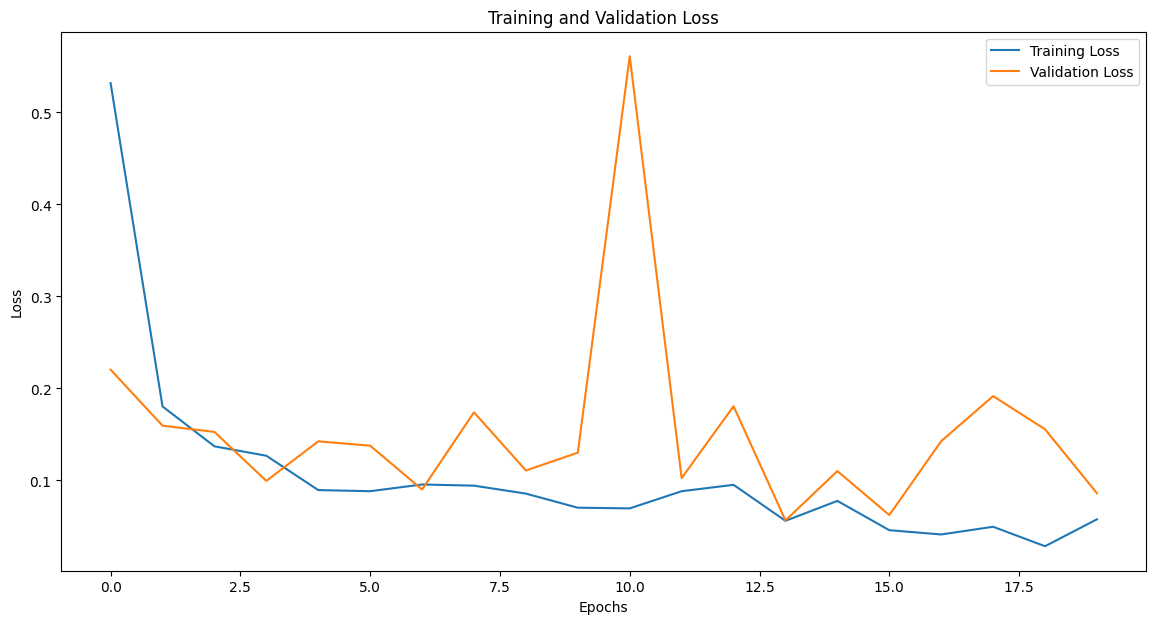

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from sklearn.metrics import recall_score, f1_score, precision_score

source_folders = {
    'train_DR': 'retinopathy_contrast_enhanced/train/DR',
    'train_No_DR': 'retinopathy_contrast_enhanced/train/No_DR',
    'valid_DR': 'retinopathy_contrast_enhanced/valid/DR',
    'valid_No_DR': 'retinopathy_contrast_enhanced/valid/No_DR',
    'test_DR': 'retinopathy_contrast_enhanced/test/DR',
    'test_No_DR': 'retinopathy_contrast_enhanced/test/No_DR'
}

csv_file_paths = {
    'train': 'image_labels_train.csv',
    'valid': 'image_labels_valid.csv',
    'test': 'image_labels_test.csv'
}

class DatasetLoader(object):
    def __init__(self, data_type):
        print(f"Loading {data_type} data into memory...")
        sys.stdout.flush()
        labels = pd.read_csv(csv_file_paths[data_type])
        self.y = np.array([1 if l == 'DR' else 0 for l in labels['Label']])
        self.y = to_categorical(self.y, 2)
        self.X_location_DR = source_folders[f'{data_type}_DR']
        self.X_location_No_DR = source_folders[f'{data_type}_No_DR']
        self.size = self.y.shape[0]
        self.inds = np.arange(self.size)
        self.lst_imgs = np.array([l for l in labels['Image Name']])
        print("Done.")

    def get_size(self):
        return self.size

    def get_steps(self, batch_size):
        return self.size // batch_size

    def get_batch(self, n):
        selected_inds = np.random.choice(len(self.lst_imgs), size=n, replace=False)
        img_names = self.lst_imgs[selected_inds]
        label = self.y[selected_inds]
        images = []
        for img_name in img_names:
            try:
                img_path = os.path.join(self.X_location_No_DR, img_name)
                image = Image.open(img_path)
            except FileNotFoundError:
                img_path = os.path.join(self.X_location_DR, img_name)
                image = Image.open(img_path)
            images.append(np.array(image.resize((299, 299))).astype(np.float32))
        images = np.array(images)
        images = preprocess_input(images)
        return images, label

train_loader = DatasetLoader('train')
valid_loader = DatasetLoader('valid')
test_loader = DatasetLoader('test')

print('Training Size: ' + str(train_loader.get_size()) + ' images')
print('Validation Size: ' + str(valid_loader.get_size()) + ' images')
print('Test Size: ' + str(test_loader.get_size()) + ' images')

IMG_SHAPE = (299, 299, 3)

def build_model(input_shape, num_classes):
    base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')
    base_model.trainable = False  # Freeze the base model
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model(IMG_SHAPE, 2)

# Training hyperparameters
batch_size = 32
nb_epochs = 20
train_steps_per_epoch = train_loader.get_steps(batch_size)
valid_steps = valid_loader.get_steps(batch_size)

# Metrics storage
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []
valid_recalls = []
valid_f1_scores = []

# Training loop
for epoch in range(nb_epochs):
    print(f"Epoch {epoch + 1}/{nb_epochs}")
    epoch_train_loss = []
    epoch_train_acc = []
    epoch_valid_loss = []
    epoch_valid_acc = []
    epoch_valid_pred = []
    epoch_valid_true = []

    # Training
    for idx in tqdm(range(train_steps_per_epoch)):
        x, y = train_loader.get_batch(batch_size)
        metrics = model.train_on_batch(x, y)
        epoch_train_loss.append(metrics[0])
        epoch_train_acc.append(metrics[1])

    # Validation
    for idx in tqdm(range(valid_steps)):
        x, y = valid_loader.get_batch(batch_size)
        metrics = model.test_on_batch(x, y)
        epoch_valid_loss.append(metrics[0])
        epoch_valid_acc.append(metrics[1])
        y_pred = model.predict(x)
        y_true = np.argmax(y, axis=1)
        y_pred = np.argmax(y_pred, axis=1)
        epoch_valid_pred.extend(y_pred)
        epoch_valid_true.extend(y_true)

    # Compute average training and validation metrics
    train_loss = np.mean(epoch_train_loss)
    train_acc = np.mean(epoch_train_acc)
    valid_loss = np.mean(epoch_valid_loss)
    valid_acc = np.mean(epoch_valid_acc)
    valid_recall = recall_score(epoch_valid_true, epoch_valid_pred)
    valid_f1 = f1_score(epoch_valid_true, epoch_valid_pred)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)
    valid_recalls.append(valid_recall)
    valid_f1_scores.append(valid_f1)

    print(f'Train Loss: {train_loss}, Train Accuracy: {train_acc}')
    print(f'Valid Loss: {valid_loss}, Valid Accuracy: {valid_acc}')
    print(f'Valid Recall: {valid_recall}, Valid F1-Score: {valid_f1}')

# Final test evaluation
test_pred = []
test_true = []
epoch_test_loss = []
epoch_test_acc = []

for idx in tqdm(range(test_loader.get_steps(batch_size))):
    x, y = test_loader.get_batch(batch_size)
    metrics = model.test_on_batch(x, y)
    epoch_test_loss.append(metrics[0])
    epoch_test_acc.append(metrics[1])
    y_pred = model.predict(x)
    y_true = np.argmax(y, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    test_pred.extend(y_pred)
    test_true.extend(y_true)

test_loss = np.mean(epoch_test_loss)
test_acc = np.mean(epoch_test_acc)
test_recall = recall_score(test_true, test_pred)
test_f1 = f1_score(test_true, test_pred)
test_precision = precision_score(test_true, test_pred)

print('\n',f'Test Loss: {test_loss * 100}%')
print(f'Test Accuracy: {test_acc*100}%')
print(f'Test Precision: {test_precision * 100}%')
print(f'Test Recall: {test_recall * 100}%')
print(f'Test F1-Score: {test_f1*100}%')

# Plotting
epochs_range = range(nb_epochs)

plt.figure(figsize=(14, 7))

plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
